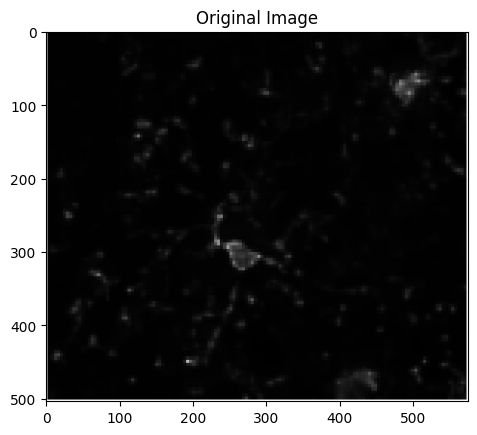

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load your image
image = cv2.imread('../image/im_M_PBS_4_8359_s8_Cell00005.png')

# Convert to grayscale (if needed)
#gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the image
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.show()

In [3]:
# Initialize a blank image with the same size as your input image
skeleton_image = np.zeros_like(image)
# Initialize a blank image with the same size as your input image
skeleton_image = np.zeros_like(image)

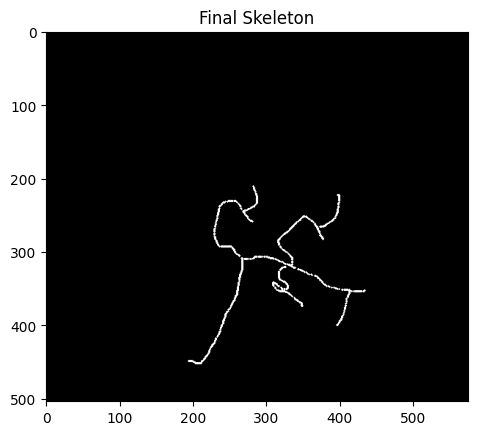

In [4]:
# Callback function to draw the skeleton
def draw_skeleton(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(skeleton_image, (x, y), 1, (255, 255, 255), -1)
    elif event == cv2.EVENT_MOUSEMOVE:
        if flags == cv2.EVENT_FLAG_LBUTTON:
            cv2.circle(skeleton_image, (x, y), 1, (255, 255, 255), -1)

# Display the image and set the callback function
cv2.namedWindow('Skeleton Drawing')
cv2.setMouseCallback('Skeleton Drawing', draw_skeleton)

while True:
    # Overlay the skeleton image on top of the original image
    overlay = cv2.addWeighted(image, 0.7, skeleton_image, 0.3, 0)

    cv2.imshow('Skeleton Drawing', overlay)
    key = cv2.waitKey(1) & 0xFF
    if key == ord('q'):  # Press 'q' to quit and save
        break

cv2.destroyAllWindows()

# Save the final skeleton image
cv2.imwrite('skeleton_image.png', skeleton_image)

# Optionally, display the final skeleton
import matplotlib.pyplot as plt
plt.imshow(skeleton_image, cmap='gray')
plt.title('Final Skeleton')
plt.show()

In [10]:
# save the final skeleton image as a binary image (0 or 255)
skeleton_image = cv2.cvtColor(skeleton_image, cv2.COLOR_BGR2GRAY)
cv2.imwrite('../masks/skeleton_image.png', skeleton_image)

True

In [11]:
shape = skeleton_image.shape

# Convert the image to a 224x224 image
skeleton_image_244 = cv2.resize(skeleton_image, (224, 224))